In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Define image size and batch size
IMG_SIZE =224
BATCH_SIZE =32

In [4]:
#creating training data parameters!
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
#creating training data with above parameters and applying transformations!
#folder=parameters.flow_from_from_directory(path,ts,bs,cm,subset)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/INTERNSHIP/NANDHINI/Brain_tumor_dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 915 images belonging to 2 classes.


In [6]:
#creating validation data!
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/INTERNSHIP/NANDHINI/Brain_tumor_dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

Found 227 images belonging to 2 classes.


In [7]:
#Define the model
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.6406 - loss: 0.8200 - val_accuracy: 0.7048 - val_loss: 0.5280
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7870 - loss: 0.4298 - val_accuracy: 0.7621 - val_loss: 0.5001
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.8710 - loss: 0.3234 - val_accuracy: 0.8634 - val_loss: 0.2999
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9374 - loss: 0.1732 - val_accuracy: 0.8370 - val_loss: 0.3078
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.9701 - loss: 0.0910 - val_accuracy: 0.8238 - val_loss: 0.3521


In [13]:
model.save('/content/drive/MyDrive/INTERNSHIP/NANDHINI/brain_tumor.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/INTERNSHIP/NANDHINI/brain_tumor.h5')
print("Model Loaded")

Model Loaded


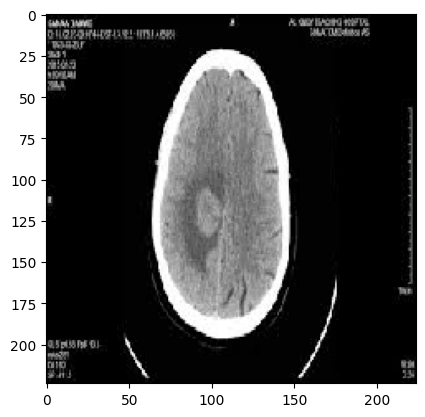

In [16]:
#load and view the test image
test_image_path="/content/drive/MyDrive/INTERNSHIP/NANDHINI/images (3).jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [17]:
#preporocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [18]:
#make predictions
prediction=model.predict(img_array)
#print the prediction
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
[[0.08775162]]


In [20]:
if (prediction>0.5):
  print("You have brain tumor")
else:
  print("You do not have brain tumor")

You do not have brain tumor
